In [1]:
import pickle
import sys
sys.path.append("..")
from model import *
import cPickle as pickle
from theano.misc.pkl_utils import load, dump, PersistentCudaNdarrayID

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5110)
/home/sturm/projects/subcellular_localization/venv/local/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
/home/sturm/projects/subcellular_localization/venv/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
val_fn = pickle.load(open("../models/fold_9_val_fn.pickle", 'rb'))

In [3]:
testd = np.load("../data/test.npz")

In [4]:
list(testd)

['X_test', 'mask_test', 'y_test']

In [5]:
inputs = testd['X_test']
targets = testd['y_test']
in_masks = testd['mask_test']

In [6]:
inputs[:128].shape

(128, 1000, 20)

In [7]:
targets.shape

(1195,)

In [8]:
in_masks[:128].shape

(128, 1000)

In [16]:
err, net_out, alpha, context, sigmoid, net_id = val_fn(inputs[-128:], targets[-128:], in_masks[-128:])

In [17]:
targets[-128:]

array([9, 9, 2, 2, 2, 2, 1, 1, 6, 6, 7, 1, 1, 0, 0, 8, 8, 4, 4, 3, 9, 1,
       2, 2, 5, 2, 4, 2, 2, 5, 0, 4, 4, 2, 2, 4, 4, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 0, 0, 3, 8, 8, 2, 2, 3, 3, 7, 1, 7, 1, 4, 4, 0, 0, 8, 8,
       4, 4, 1, 3, 2, 2, 0, 5, 5, 2, 4, 4, 4, 4, 6, 6, 6, 6, 3, 1, 1, 8,
       0, 0, 1, 1, 1, 4, 4, 0, 0, 7, 4, 4, 0, 2, 3, 3, 1, 1, 2, 4, 4, 2,
       0, 0, 1, 9, 9, 4, 4, 6, 6, 3, 1, 1, 4, 1, 1, 1, 4, 4], dtype=int32)

In [18]:
%matplotlib inline
from pylab import * 

In [19]:
net_out

array([[5.25257519e-06, 5.58678061e-02, 1.70368022e-08, ...,
        1.05109031e-07, 9.21248920e-06, 9.43975091e-01],
       [3.20457184e-04, 9.95092273e-01, 1.81668351e-08, ...,
        7.35593186e-09, 7.93879508e-07, 4.58341138e-03],
       [1.10843579e-09, 1.47769697e-07, 9.99996901e-01, ...,
        1.11231401e-07, 6.73608781e-07, 2.75175105e-10],
       ...,
       [8.82594104e-05, 9.95387018e-01, 1.15085278e-07, ...,
        4.26886082e-08, 1.14884153e-06, 4.51306673e-03],
       [6.41388442e-10, 2.09739137e-09, 2.66973842e-07, ...,
        8.12117591e-08, 1.13667238e-06, 1.53372204e-09],
       [7.34524574e-09, 6.98956683e-07, 2.38995887e-02, ...,
        4.28548731e-07, 1.08143635e-04, 9.95594451e-09]], dtype=float32)

In [20]:
sigmoid

array([[0.41283903, 0.6530099 , 0.5429764 , ..., 0.4156849 , 0.46997982,
        0.46338692],
       [0.46914294, 0.7090225 , 0.46731004, ..., 0.2948817 , 0.42751688,
        0.4796016 ],
       [0.14134473, 0.4851114 , 0.30548978, ..., 0.6787082 , 0.695816  ,
        0.8552116 ],
       ...,
       [0.4666672 , 0.68533105, 0.5782421 , ..., 0.26310495, 0.4146427 ,
        0.50167733],
       [0.24750775, 0.47934136, 0.30172822, ..., 0.47167072, 0.8325074 ,
        0.6719644 ],
       [0.29702005, 0.47915396, 0.42213574, ..., 0.5438656 , 0.83567613,
        0.62401456]], dtype=float32)

In [21]:
net_id

array([[-0.04287234,  0.01806925, -0.26266515, ...,  0.19161816,
         0.39720044,  0.21281368],
       [ 0.9878556 , -0.7353019 , -0.12228326, ..., -0.22547288,
         0.21696518, -0.06043078],
       [-0.29068756, -0.46438256,  0.63058656, ..., -1.5454322 ,
        -0.9186711 ,  0.8534941 ],
       ...,
       [ 0.83526456, -0.39246854, -0.16554584, ..., -0.18058549,
         0.19834009,  0.09976666],
       [ 0.6027072 , -2.5078762 , -0.55630004, ...,  0.7536267 ,
         0.32368293,  2.5080671 ],
       [ 0.90180886, -2.2150235 , -1.3173257 , ..., -0.02815866,
         0.13866583,  1.4370823 ]], dtype=float32)

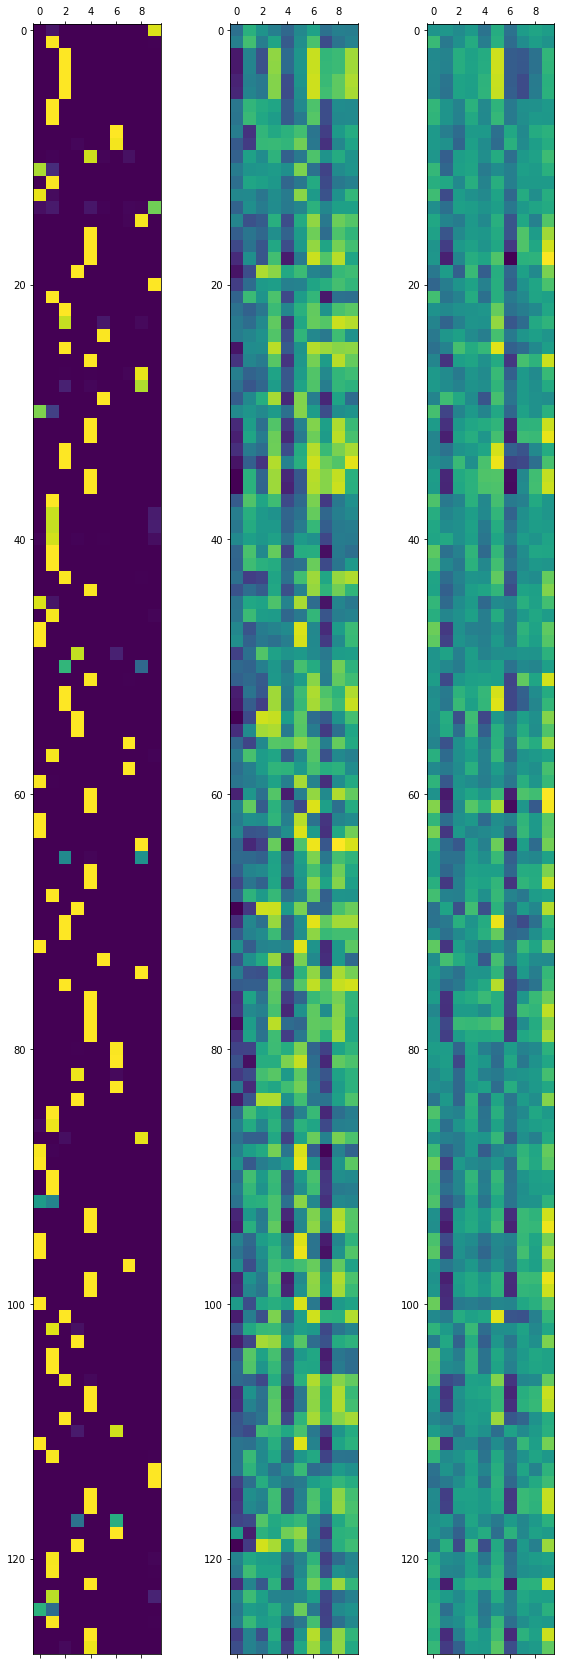

In [26]:
fig, (ax1, ax2, ax3) = subplots(1, 3, figsize=(10, 30))
ax1.matshow(net_out)
ax2.matshow(sigmoid)
ax3.matshow(net_id)